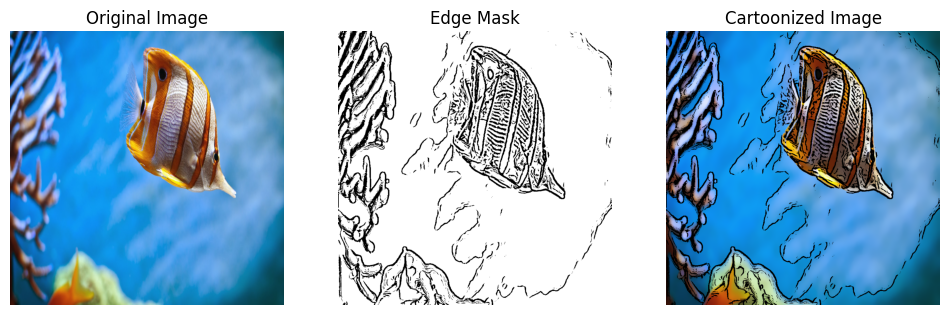

In [17]:
#Simple Approach

import cv2
import numpy as np
import matplotlib.pyplot as plt

def cartoonize_image(img_path):
    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        return "Image not found"

    # Resize the image for better effect visibility
    img = cv2.resize(img, (800, 800))

    # OpenCV reads images in BGR, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply bilateral filter to reduce the color palette
    num_bilateral = 7  # Number of bilateral filtering steps
    img_color = img_rgb
    for _ in range(num_bilateral):
        img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

    # Convert to grayscale and apply median blur
    gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    gray = cv2.medianBlur(gray, 7)

    # Detect and enhance edges
    edge = cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

    # Convert back to color, so edges are now black in color image
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB)

    # Combine edge features and the reduced color image
    cartoon = cv2.bitwise_and(img_color, edge)

    # Plotting the images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edge)
    plt.title('Edge Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cartoon)
    plt.title('Cartoonized Image')
    plt.axis('off')

    plt.show()

    # Save the cartoonized image to the specified path
    cv2.imwrite('cartoon1.jpg', cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR))

# Usage example
cartoonize_image('fish.jpg')


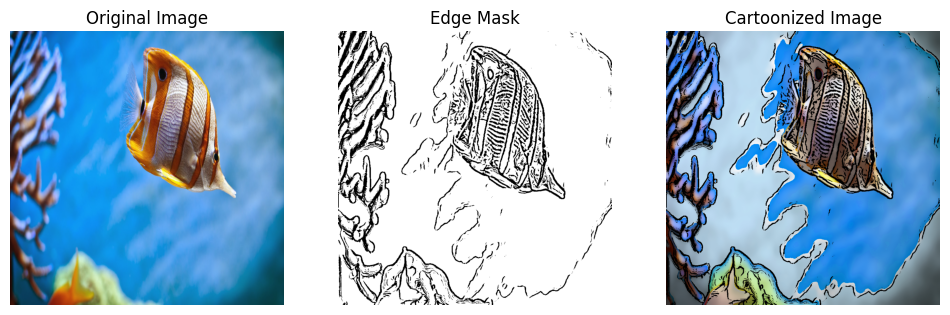

In [18]:
#Intermediate Approach

import cv2
import numpy as np
import matplotlib.pyplot as plt

def cartoonize_image_intermediate(img_path):
    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        return "Image not found"

    # Resize the image for better effect visibility
    img = cv2.resize(img, (800, 800))

    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 1: Apply a bilateral filter to reduce the color palette
    img_color = img_rgb
    num_bilateral = 7  # Increasing this can slow down the process but improves results
    for _ in range(num_bilateral):
        img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

    # Step 2: Convert to grayscale and apply median blur
    gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    smooth = cv2.medianBlur(gray, 7)

    # Step 3: Enhance edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(smooth, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  blockSize=9,
                                  C=2)

    # Step 4: Convert back to color so edges are now black
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

    # Step 5: Enhance colors and blur for a smoother effect
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=75, sigmaSpace=75)
    img_blur = cv2.GaussianBlur(img_color, (5, 5), 0)

    # Increase the saturation
    img_blur = cv2.cvtColor(img_blur, cv2.COLOR_RGB2HSV)
    img_blur[:, :, 1] = img_blur[:, :, 1]*1.3
    img_blur = cv2.cvtColor(img_blur, cv2.COLOR_HSV2RGB)

    # Step 6: Combine the edges with the color image
    cartoon = cv2.bitwise_and(img_blur, edges)

    # Plotting the images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges)
    plt.title('Edge Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cartoon)
    plt.title('Cartoonized Image')
    plt.axis('off')

    plt.show()

    # Save the cartoonized image to the specified path
    cv2.imwrite('cartoon2.jpg', cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR))

# Usage example
cartoonize_image_intermediate('fish.jpg')


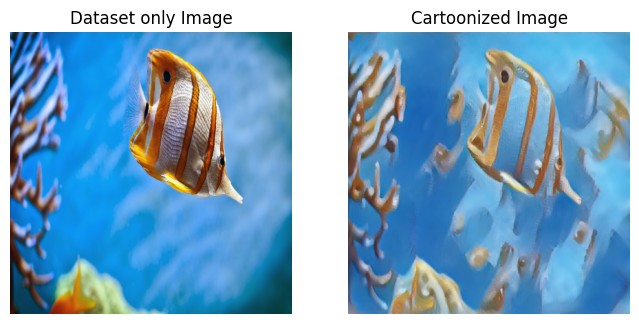

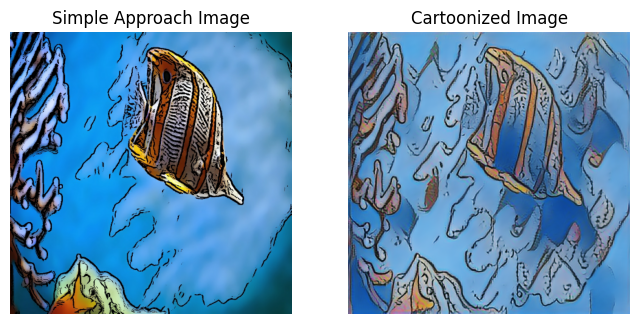

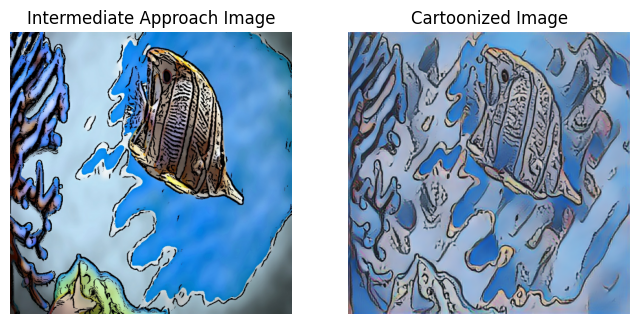

In [20]:
#Advance Approach

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)  # Ensure single image
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize the image
    img = tf.image.resize(img, [512, 512])  # Resize the image to the expected input size
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255  # Scale back up to 0-255 range
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1  # Check for a single image
        tensor = tensor[0]
    return tensor  # Return RGB tensor for matplotlib

def cartoonize_image_advanced(img_path):
    content_image = load_image(img_path)
    # Load the pre-trained style transfer model from TensorFlow Hub
    hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_module(content_image, content_image)[0]
    return tensor_to_image(stylized_image)

def display_images(original_image_path):
    original_image = load_image(original_image_path)
    cartoonized_image = cartoonize_image_advanced(original_image_path)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(tensor_to_image(original_image))
    plt.title('Dataset only Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoonized_image)
    plt.title('Cartoonized Image')
    plt.axis('off')
    plt.show()

def display_images1(original_image_path):
    original_image = load_image(original_image_path)
    cartoonized_image = cartoonize_image_advanced(original_image_path)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(tensor_to_image(original_image))
    plt.title('Simple Approach Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoonized_image)
    plt.title('Cartoonized Image')
    plt.axis('off')
    plt.show()

def display_images2(original_image_path):
    original_image = load_image(original_image_path)
    cartoonized_image = cartoonize_image_advanced(original_image_path)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(tensor_to_image(original_image))
    plt.title('Intermediate Approach Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoonized_image)
    plt.title('Cartoonized Image')
    plt.axis('off')
    plt.show()

# Example usage with your image:
display_images('fish.jpg')
display_images1('cartoon1.jpg')
display_images2('cartoon2.jpg')